<a href="https://colab.research.google.com/github/IzabellaJastrow/analises_pokemon/blob/main/Pokemons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizando as informações dos pokemons!

### Após algumas semanas de estudo de Python para DataScience, me desafiei a realizar a análise de um dataset disponível de forma autônoma. Para manter o desafio leve e também chamar atenção de um público diverso, analisei as informações dos pokémons lançados até a 7ª geração. 

Como é o primeiro projeto feito independentemente tem um caráter mais geral, explorando alguns gráficos e correlações enquanto reviso conceitos estudados até então. 




### O dataset é de domínio público, obtido na plataforma Kaggle. Ele conta com as informações de todos os pokémons lançados até a 7ª geração (2019).
As informações contidas são:
* Name: Nome do Pokémon;
* Type 1: Tipo;
* Type 2: Alguns Pokémons podem ter 2 tipos;
* Total: Soma dos demais dados do Pokémon;
* HP: Pontos de vida;
* Attack: Força de ataque;
* Defense: Defesa contra os ataques normais;
* SP Atk: Força do ataque especial;
* SP Def: Defesa contra os ataques especiais;
* Speed: Determina qual Pokémon ataca primeiro;
* Generation: Geração que foi lançado;
* Legendary: Se o pokémon é lendário ou não.


## Importando bibliotecas e arquivos necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")

In [3]:
dataset.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
53,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
669,590,Foongus,Grass,Poison,294,69,55,45,55,55,15,5,False
382,333,Swablu,Normal,Flying,310,45,40,60,40,75,50,3,False
195,163,Hoothoot,Normal,Flying,262,60,30,30,36,56,50,2,False
638,559,Scraggy,Dark,Fighting,348,50,75,70,35,70,48,5,False


## Tratamento inicial dos dados

Limpeza dos dados, verificação de inconsistências, tipos das variáveis. Tratamento inicial é indispensável para não gerar problemas durante as análises futuras

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           916 non-null    int64 
 1   Name        916 non-null    object
 2   Type 1      916 non-null    object
 3   Type 2      492 non-null    object
 4   Total       916 non-null    int64 
 5   HP          916 non-null    int64 
 6   Attack      916 non-null    int64 
 7   Defense     916 non-null    int64 
 8   Sp. Atk     916 non-null    int64 
 9   Sp. Def     916 non-null    int64 
 10  Speed       916 non-null    int64 
 11  Generation  916 non-null    int64 
 12  Legendary   916 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 86.9+ KB


Temos dados dos 809 pokemons lançados até a geração 7 (2019). O número de entradas no dataset é maior pois considera as diferentes evoluções dos pokemons como novas entradas. 
Das 13 colunas que temos na base de dados, iremos excluir a primeira (#) pois é o ID dado pelo autor não considerando as evoluções (exemplo: Charizard e Charizard Mega recebem o mesmo ID). Para evitar erros nas chamadas por indíce essa coluna será apagada. 


Para melhor manipulação algumas colunas serão renomeadas conforme dicionário abaixo:
* Type 1: Type_1
* Type 2: Type_2
* Sp. Atk: Sp_atk
* Sp. Def: Sp_def


Afim de evitarmos a manipulação de dados com valores nulos, os pokemons que não possuem um segundo tipo serão preenchidos com null

In [5]:
del dataset['#'] #deletando a coluna #
dataset.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
dataset = dataset.rename(columns= {   #renomenado as colunas conforme dicionario
    "Type 1": "Type_1",
    "Type 2": "Type_2",
    "Sp. Atk": "Sp_atk",
    "Sp. Def": "Sp_def"})
dataset.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
dataset.Type_2 = dataset.Type_2.fillna("null") #preenchendo dados nulos da coluna Type_2 com a string null
dataset.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,null,309,39,52,43,60,50,65,1,False


Tratamento dos dados finalizados, agora iremos analisa-los.


## Analisando os dados dos pokemons

### Uma rápida análise inicial dos dados númericos pelo describe para observar as médias (mean), desvio padrão (std), e os quartis. 

In [90]:
dataset.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Total,916.0,436.99,119.97,175.0,330.0,454.5,515.5,780.0
HP,916.0,69.37,25.72,1.0,50.0,66.0,80.0,255.0
Attack,916.0,79.89,32.51,5.0,55.0,75.0,100.0,190.0
Defense,916.0,74.41,31.28,5.0,50.0,70.0,90.0,230.0
Sp_atk,916.0,72.96,33.01,10.0,50.0,65.0,95.0,194.0
Sp_def,916.0,72.12,27.78,20.0,50.0,70.0,90.0,230.0
Speed,916.0,68.25,29.30,5.0,45.0,65.0,90.0,180.0
Generation,916.0,3.67,1.96,1.0,2.0,4.0,5.0,7.0


### Verificando quais os pokemons nos extremos de cada coluna

#### Identificando os pokemons com menores valores de HP, Attack, Defense, Sp_atk, Sp_def e Speed

In [9]:
value_min = dataset.HP.min()
dataset[dataset.HP == value_min] #filtrando pokemon com o valor mínimo de HP


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
334,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [10]:
value_min = dataset.Attack.min()
dataset[dataset.Attack == value_min] #Filtrando pokemons com valor mínimo de Attack

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
139,Chansey,Normal,null,450,250,5,5,35,105,50,1,False
506,Happiny,Normal,null,220,100,5,5,15,65,30,4,False


In [11]:
value_min = dataset.Defense.min()
dataset[dataset.Defense == value_min] #Filtrando pokemons com valor mínimo de Defense

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
139,Chansey,Normal,null,450,250,5,5,35,105,50,1,False
506,Happiny,Normal,null,220,100,5,5,15,65,30,4,False


In [12]:
value_min = dataset.Sp_atk.min()
dataset[dataset.Sp_atk == value_min] #Filtrando pokemons com valor mínimo de Sp_atk

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
36,SandshrewAlolan Sandshrew,Ice,Steel,300,50,75,90,10,35,40,1,False
248,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
399,Feebas,Water,null,200,20,15,20,10,55,80,3,False
504,Bonsly,Rock,null,290,50,80,95,10,45,10,4,False


In [13]:
value_min = dataset.Sp_def.min()
dataset[dataset.Sp_def == value_min] #Filtrando pokemons com valor mínimo de Sp_def

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
13,Caterpie,Bug,null,195,45,30,35,20,20,45,1,False
16,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
157,Magikarp,Water,null,200,20,10,55,15,20,80,1,False
206,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
365,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False
447,DeoxysAttack Forme,Psychic,null,600,50,180,20,180,20,150,3,True


In [14]:
value_min = dataset.Speed.min()
dataset[dataset.Speed == value_min] #Filtrando pokemons com valor mínimo de Speed

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
248,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
513,Munchlax,Normal,null,390,135,85,40,40,85,5,4,False
873,Pyukumuku,Water,null,410,55,60,130,30,130,5,7,False


#### Identificando os pokemons com maiores valores de HP, Attack, Defense, Sp_atk, Sp_def e Speed


In [15]:
value_max = dataset.HP.max()
dataset[dataset.HP == value_max] #filtrando pokemon com o valor máximo de HP

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
279,Blissey,Normal,null,540,255,10,10,75,135,55,2,False


In [16]:
value_max = dataset.Attack.max()
dataset[dataset.Attack == value_max] #Filtrando pokemons com valor máximo de Attack

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
181,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [17]:
value_max = dataset.Defense.max()
dataset[dataset.Defense == value_max] #Filtrando pokemons com valor máximo de Defense

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
242,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
248,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
351,AggronMega Aggron,Steel,null,630,70,140,230,60,80,50,3,False


In [18]:
value_max = dataset.Sp_atk.max()
dataset[dataset.Sp_atk == value_max] #Filtrando pokemons com valor máximo de Sp_atk

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
182,MewtwoMega Mewtwo Y,Psychic,null,780,106,150,70,194,120,140,1,True


In [19]:
value_max = dataset.Sp_def.max()
dataset[dataset.Sp_def == value_max] #Filtrando pokemons com valor máximo de Sp_def

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
248,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


In [20]:
value_max = dataset.Speed.max()
dataset[dataset.Speed == value_min] #Filtrando pokemons com valor máximo de Speed

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
248,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
513,Munchlax,Normal,null,390,135,85,40,40,85,5,4,False
873,Pyukumuku,Water,null,410,55,60,130,30,130,5,7,False


## Visulizando gráficamente alguns dados

### Distribuição dos valores básicos (HP, Ataque, Defesa, Ataque Especial, Defesa Especial, Velocidade)

Os gráficos abaixo mostram a distribuição dos valores considerando todos os pokémons juntos e após por geração. 

#### Distribuição do ataque dos pokémons

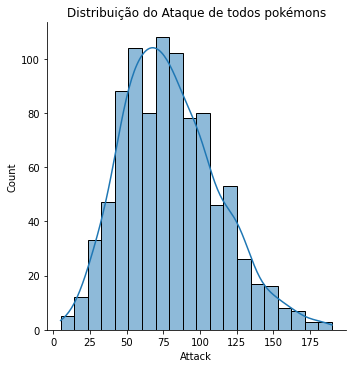

In [76]:
sns.displot(x = 'Attack', data = dataset, kde = True,).set(title = "Distribuição do Ataque de todos pokémons")

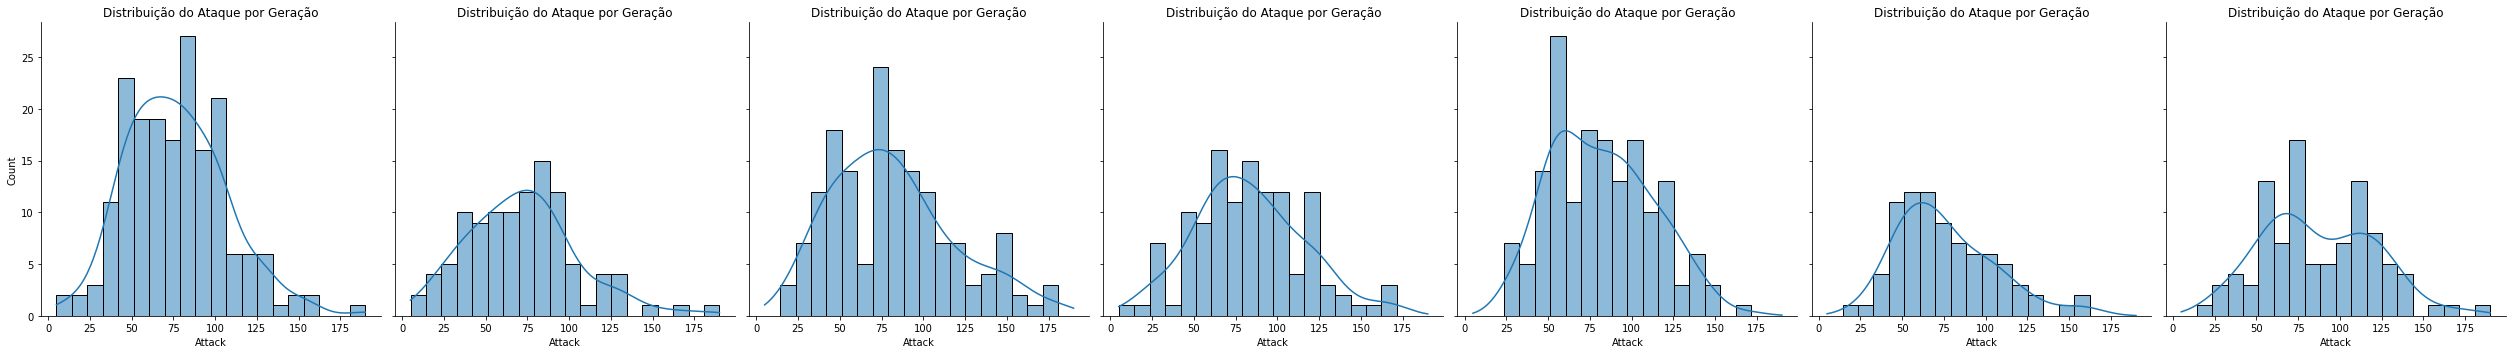

In [22]:
sns.displot(x = 'Attack', col = "Generation", data = dataset, kde = True,).set(title = "Distribuição do Ataque por Geração")

Possível observar que na média geral temos o poder de ataque distribuído majoritariamente na faixa de 50 - 75, porém a cada geração essa distribuição teve características diferentes. A comparação entre a distribuição da primeira e sexta deixa bem visível essa diferença. 

#### Distribuição da defesa dos pokémons

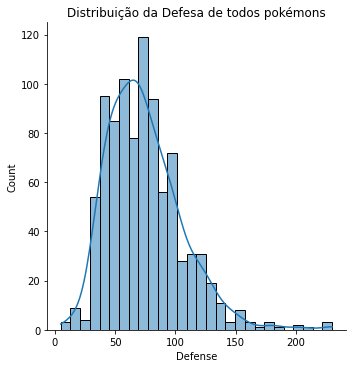

In [75]:
sns.displot(x = 'Defense', data = dataset, kde = True,).set(title = "Distribuição da Defesa de todos pokémons")

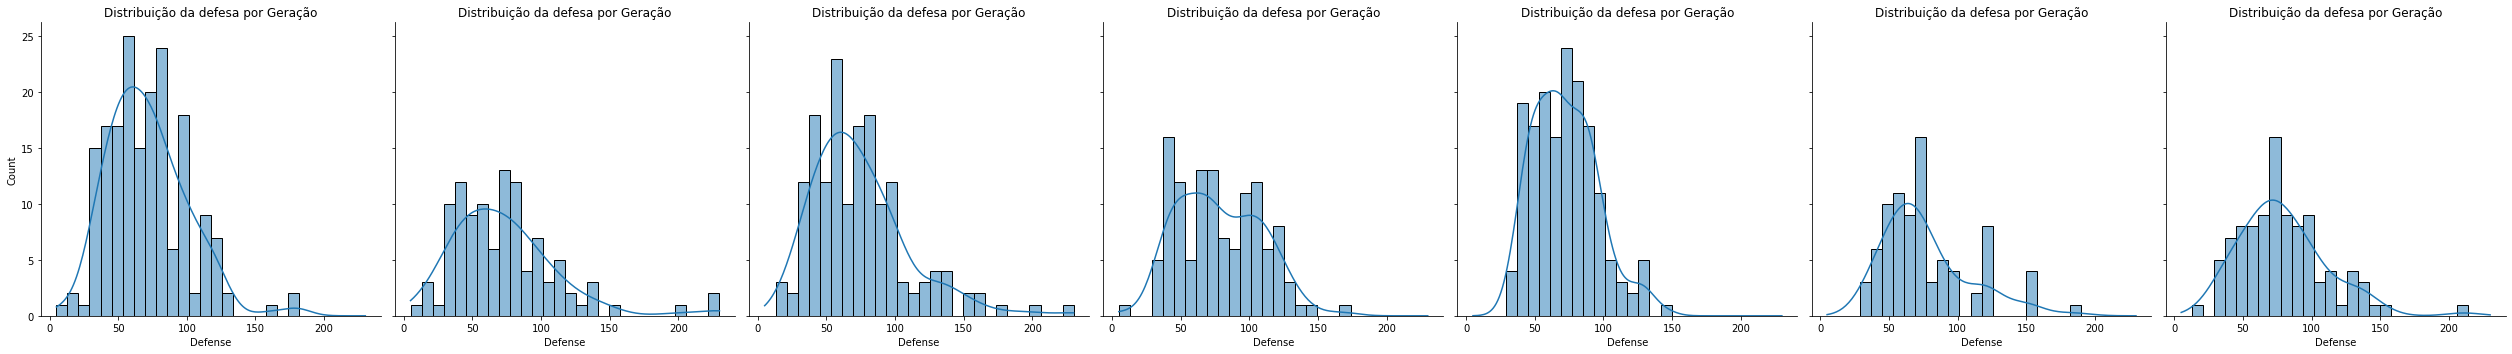

In [24]:
sns.displot(x = 'Defense', col = "Generation", data = dataset, kde = True,).set(title = "Distribuição da defesa por Geração")

A defesa parece ter uma distribuição mais homogênea entre as gerações, mas ainda há diferenças visíveis. 

#### Distribuição dos pontos de vida

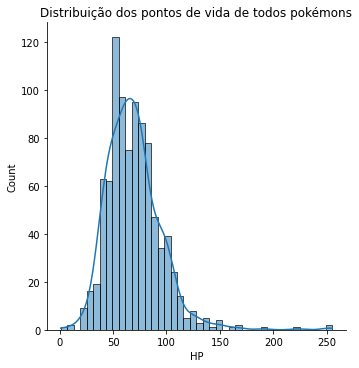

In [91]:
sns.displot(x = 'HP', data = dataset, kde = True,).set(title = "Distribuição dos pontos de vida de todos pokémons")

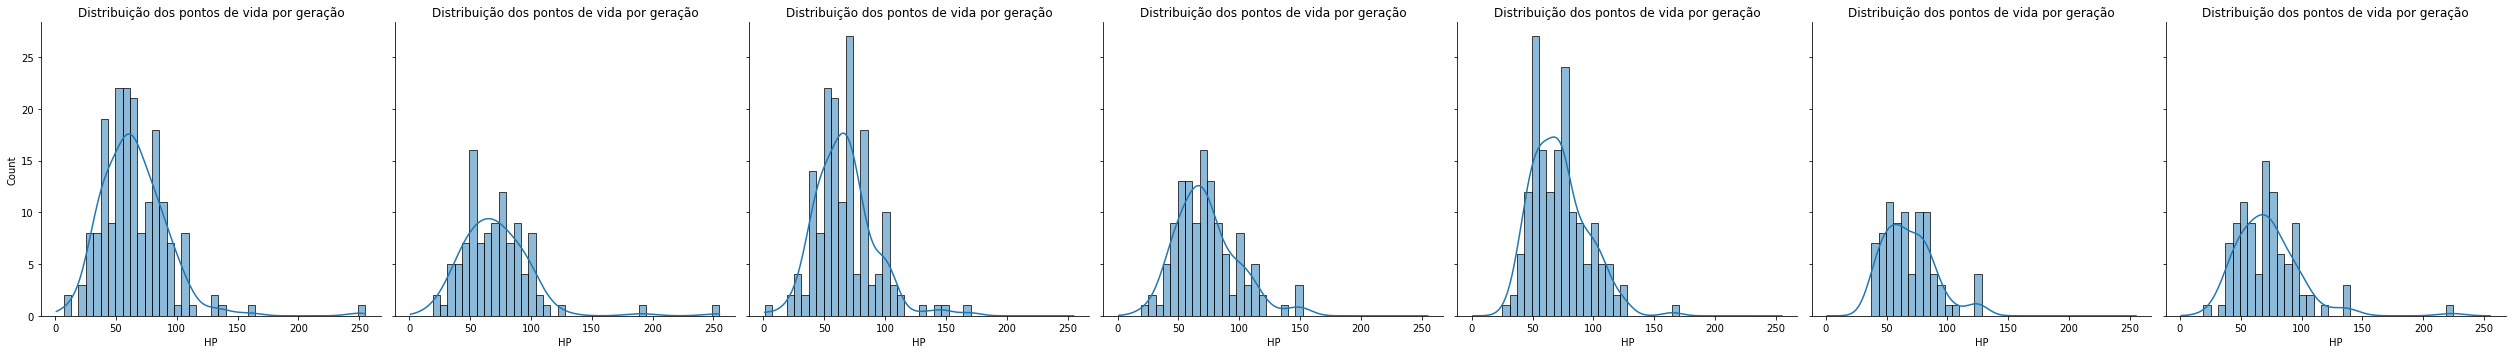

In [77]:
sns.displot(x = 'HP', col = 'Generation', data = dataset, kde = True,).set(title = "Distribuição dos pontos de vida por geração")

Nos pontos de vida a sexta geração aparentemente teve uma distribuição mais baixa porém mais homogênea. Entretanto, todas gerações mantiveram o pico por volta de 50 pontos. 

#### Distribuição dos pontos de ataque especial

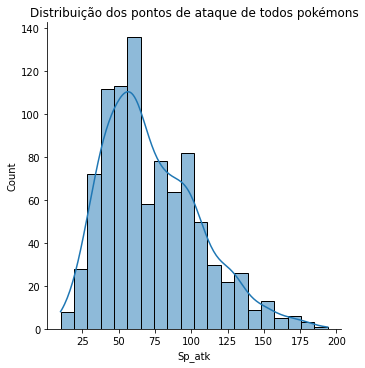

In [78]:
sns.displot(x = 'Sp_atk', data = dataset, kde = True,).set(title = "Distribuição dos pontos de ataque de todos pokémons")

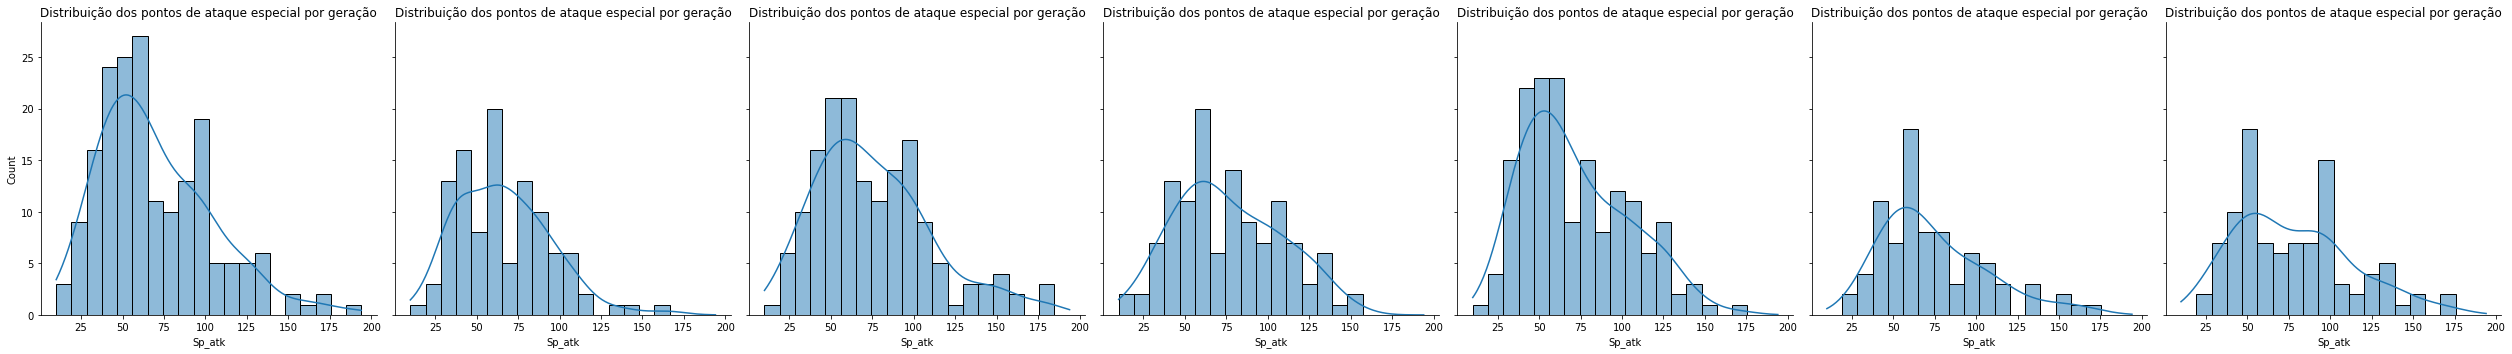

In [79]:
sns.displot(x = 'Sp_atk', col = 'Generation', data = dataset, kde = True,).set(title = "Distribuição dos pontos de ataque especial por geração")

Distribuição bem variada em cada geração. Enquanto a primeira e quinta tiveram picos mais definidos entre 40 a 70 pontos, outras apresentaram uma distribuição maior entre os valores. 

#### Distribuição dos pontos de defesa especial

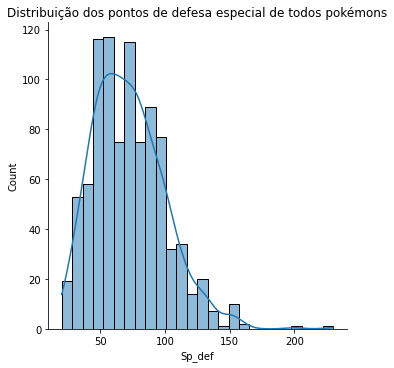

In [80]:
sns.displot(x = 'Sp_def', data = dataset, kde = True,).set(title = "Distribuição dos pontos de defesa especial de todos pokémons")

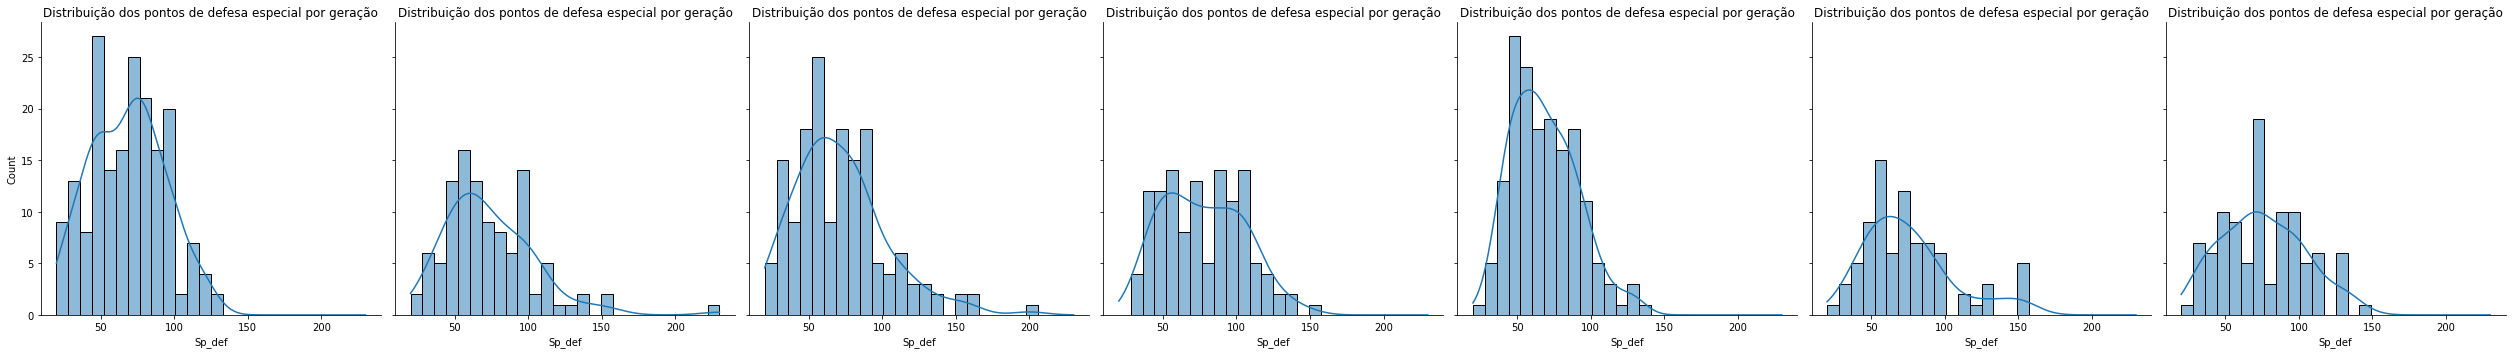

In [81]:
sns.displot(x = 'Sp_def', col = 'Generation', data = dataset, kde = True,).set(title = "Distribuição dos pontos de defesa especial por geração")

Padrão similar ao do ataque, com a primeira e quinta geração tendo picos mais definidos entre 40 a 70 pontos e outras com uma distribuição maior entre os valores. 

#### Distribuição da velocidade

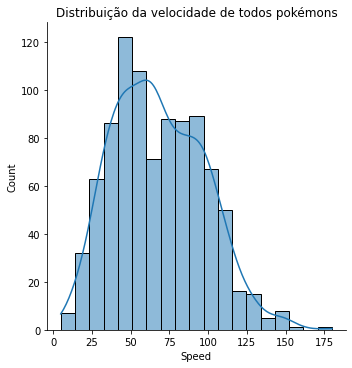

In [84]:
sns.displot(x = 'Speed', data = dataset, kde = True,).set(title = "Distribuição da velocidade de todos pokémons")

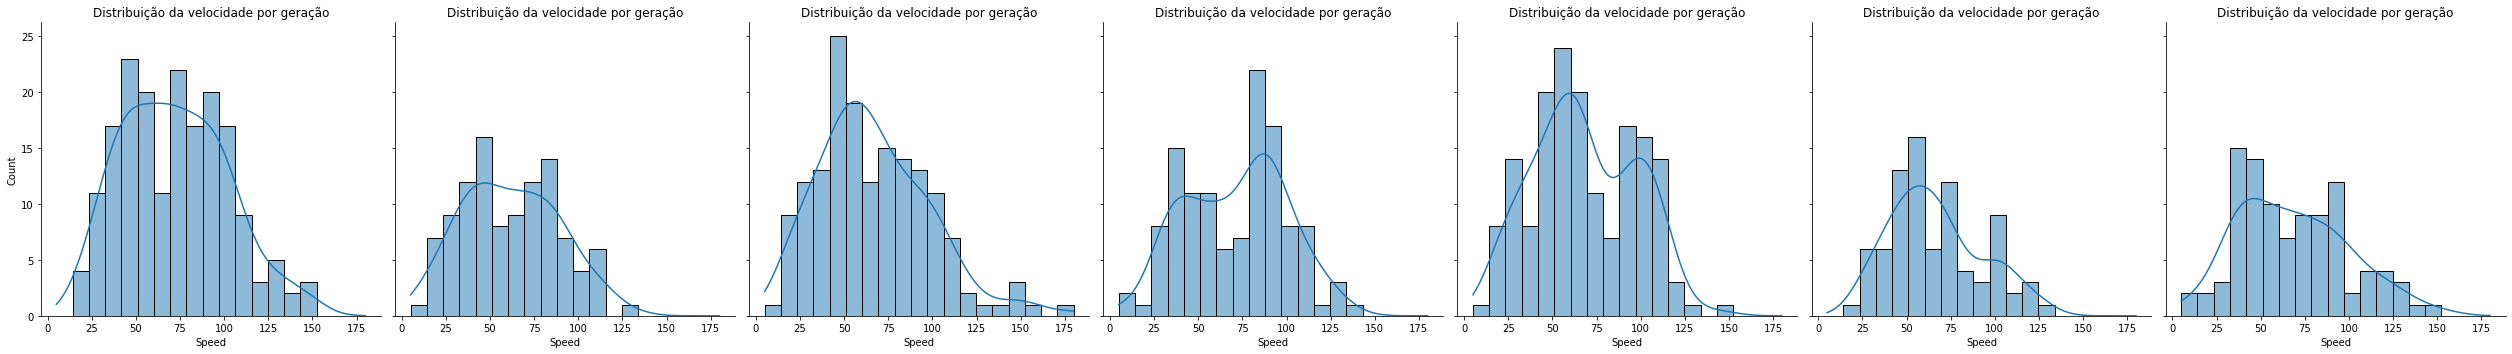

In [85]:
sns.displot(x = 'Speed', col = 'Generation', data = dataset, kde = True,).set(title = "Distribuição da velocidade por geração")

Tendência de curvas com platôs maiores e menos picos isolados entre as gerações. 

### Análises dos pokémons por tipo

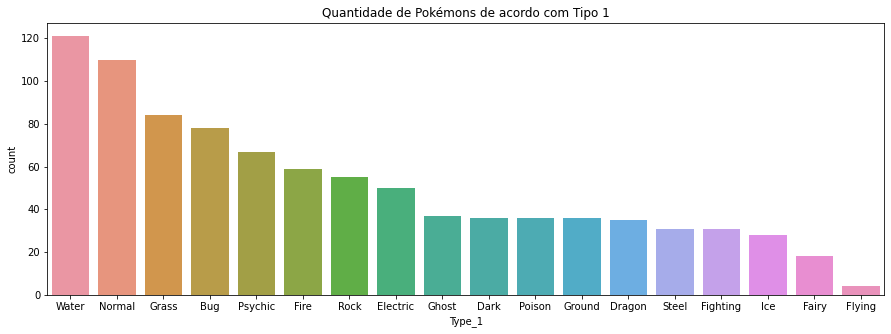

In [33]:
plt.figure(figsize=(15, 5))

plt.title('Quantidade de Pokémons de acordo com Tipo 1')
sns.countplot(data = dataset, x='Type_1', order = dataset['Type_1'].value_counts().index)

Os tipos não são distribuídos de forma uniforme. Será mais fácil os jogadores se depararem com pokémons do tipo água ou normal do que voadores ou fadas, por exemplo. 

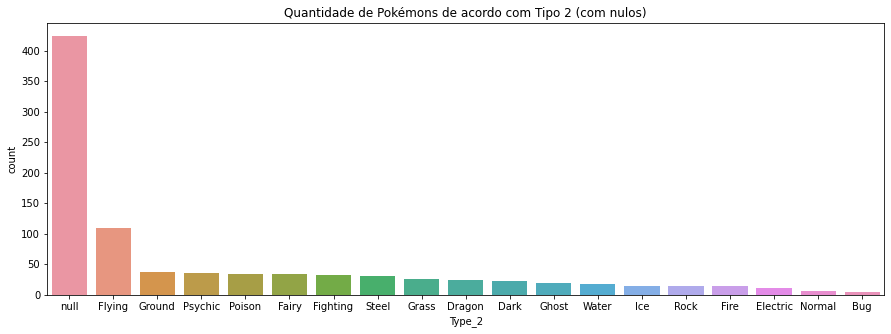

In [34]:
plt.figure(figsize=(15, 5))

plt.title('Quantidade de Pokémons de acordo com Tipo 2 (com nulos)')
sns.countplot(data = dataset, x='Type_2', order = dataset['Type_2'].value_counts().index)

Expressiva quantidade que não possui tipo dois. Para melhor visualização da distribuição entre os que possuem tipo 2 os valores 'null' serão retirados para o gráfico a seguir.


In [35]:

dataset_sem_null = dataset[dataset.Type_2 != 'null']
dataset_sem_null.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


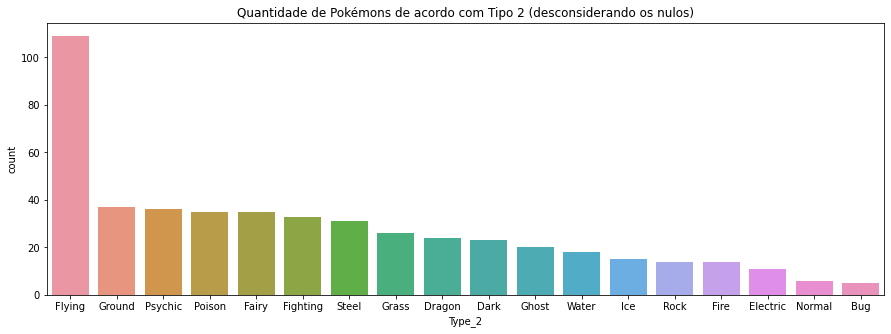

In [36]:
plt.figure(figsize=(15, 5))

plt.title('Quantidade de Pokémons de acordo com Tipo 2 (desconsiderando os nulos)')
sns.countplot(data = dataset_sem_null, x='Type_2', order = dataset_sem_null['Type_2'].value_counts().index)

Distribuição quase ao contrário do que no gráfico do tipo 1. Agora, se um pokémon possuir um tipo secundário, o mais provável é que seja voador. 

#### Variação do Pontos Total por tipo 1 do pokémon

Text(0.5, 0.98, 'Variação do Total por tipo 1 do pokemon')

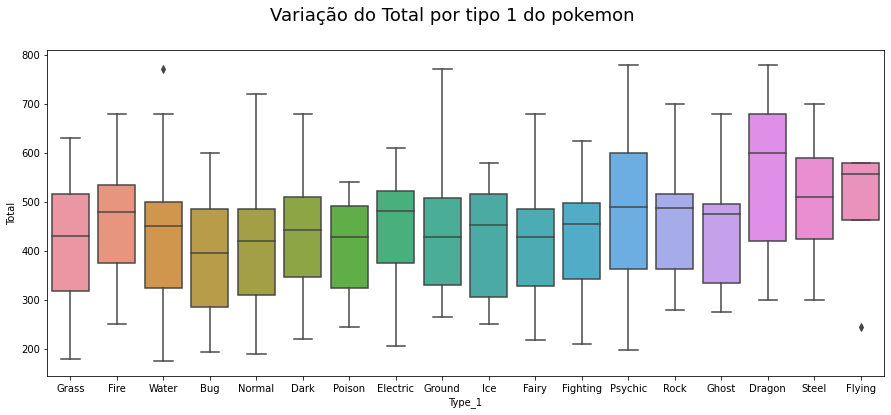

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type_1", y = "Total", data = dataset)
plt.suptitle("Variação do Total por tipo 1 do pokemon", fontsize = 18)

Mediana similares do valor do Total entre os diferentes tipos, porém os quartis e valores extremos são bem diferentes. 
Destaque para o tipo dragão, que possui a maior mediana. 

### Distribuição dos pokémons por geração

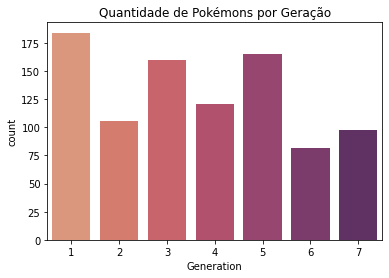

In [67]:
plt.title('Quantidade de Pokémons por Geração')
sns.countplot(data = dataset, x='Generation', palette = "flare")

Queda na quantidade lançada nas últimas gerações. Será uma tendência? 

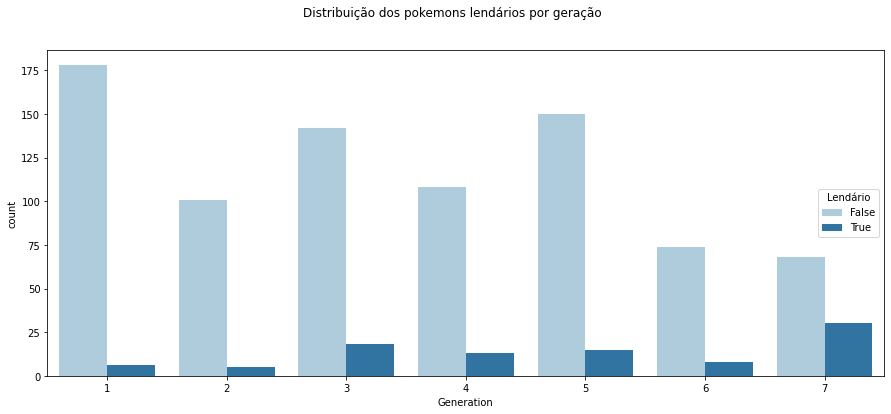

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(x="Generation", data=dataset,  hue = "Legendary", palette = "Paired")
plt.suptitle("Distribuição dos pokemons lendários por geração")
plt.legend(loc='center right', title ="Lendário" )

Maioria dos pokémons lendários foram lançados na sétima geração (última do dataset). Verificado anteriormente que foi uma das gerações com menor quantidade total, então a proporção de lendários neste será bem maior que as outras. Será um apelo para atrair audiência?

### Comparação com os pokémons Lendários

#### Ataque e defesa

Text(0.5, 0.98, 'Distribuição do ataque e defesa entre lendários e não lendários')

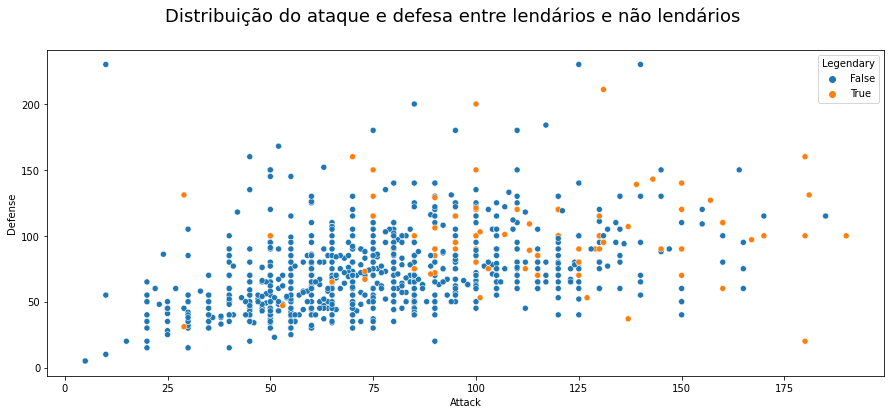

In [86]:
plt.figure(figsize=(15,6))

sns.scatterplot(x ="Attack", y = "Defense", data = dataset, hue = "Legendary",  )
plt.suptitle("Distribuição do ataque e defesa entre lendários e não lendários", fontsize = 18)

Distribuição do ataque e defesa até similar entre lendários e não lendários na média, porém há uma tendência maior dos lendários de estarem nos pontos mais altos

Text(0.5, 0.98, 'Distribuição do ataque especial vs defesa especial entre lendários e não lendários')

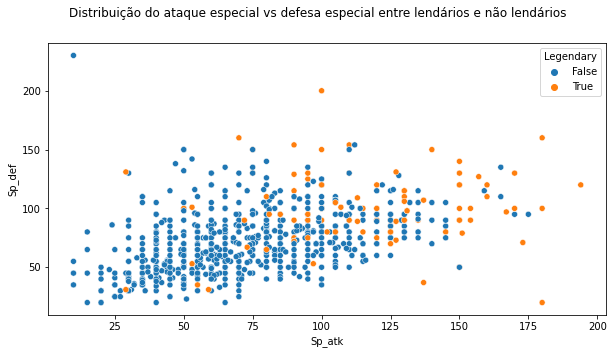

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "Sp_atk", y= "Sp_def", hue = "Legendary", data = dataset,)
plt.suptitle("Distribuição do ataque especial vs defesa especial entre lendários e não lendários")

Divisão mais clara agora. Lendários mais à direita do gráfico, com ataques especiais mais fortes. Defesas mais altas não são tão comuns, porém a maioria dos valores mais altos são dos lendários. O combo defesa e ataque altos também estão mais presentes entre lendários.

#### Quantidade de pokemons lendários


In [40]:
round(dataset.Legendary.value_counts(normalize = True)*100,2)

False    89.63
True     10.37
Name: Legendary, dtype: float64

Aproximadamente 10% dos pokemons são lendários

In [49]:
grupo_tipo = dataset.groupby(by=['Legendary'])

In [92]:
grupo_tipo.mean().round(2)

,Total,HP,Attack,Defense,Sp_atk,Sp_def,Speed,Generation
Legendary,,,,,,,,
False,416.57,66.82,76.01,71.67,67.98,68.95,65.15,3.54
True,613.45,91.45,113.43,98.03,116.03,99.51,95.00,4.79


Média dos pontos entre lendários e não lendários. 

Text(0.5, 0.98, 'Variação dos pontos Total por Tipo e Lendário')

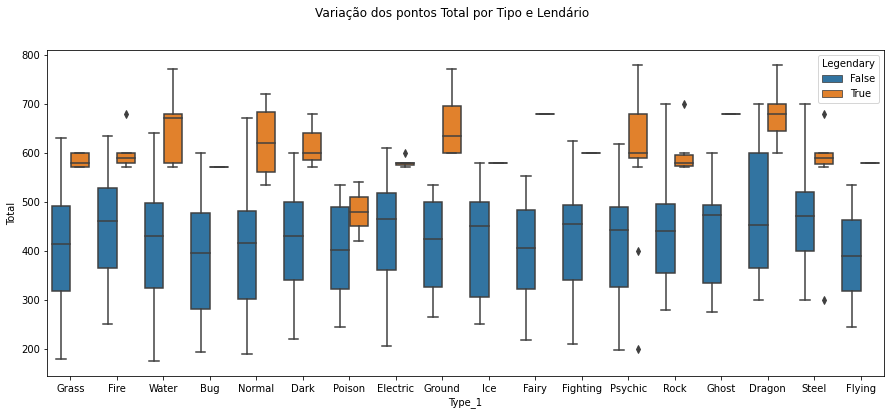

In [89]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "Type_1", y = "Total", data = dataset, hue = "Legendary")
plt.suptitle("Variação dos pontos Total por Tipo e Lendário")

Gráfico similar ao apresentado anteriormente, mas agora ao separar os valores dos lendários as medianas mudam consideravelmente. Agora Fantasma e Aço são os que possuem maior mediana, entre os não lendários. 
Percebe-se também que entre os lendários a distribuição dos quartis são bem diferentes, alguns tipos variam muito o total de pontos de seus lendários e outros possuem uma distribuição mais uniforme. 